In [1]:
from utility_bferror import *
import datetime


tb = BFSolver_Toolbox()
er = BFSovler3D_Error()

# 1. Try One Case

In [2]:
i = 0

ndata,ndataVar = er.ndata[i],er.ndataVar[i]
nmcbg,nmcbgVar = er.nmcbg[i],er.nmcbgVar[i]
nfake,nfakeVar = er.nfake[i],er.nfakeVar[i]
a,aVar = er.a[i],er.aVar[i]
aVar[a<0.001] = np.zeros_like(a)[a<0.001]

slv0 = BFSolver3D(a)
br0 = slv0.solveQuadEqn(slv0.setMeasuredX(nData=ndata, nMcbg=nmcbg+nfake))
print(br0)

[0.10819576 0.11145481 0.10785098]


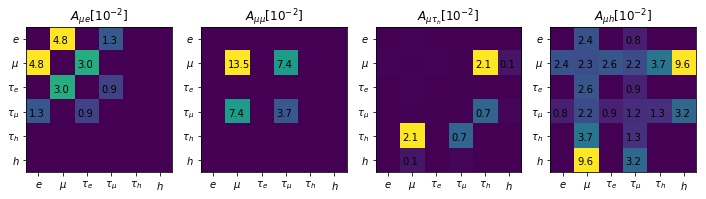

In [4]:
trigger = 'mu'
tb.imshow4Matrix(a,trigger)
plt.savefig("../plots/acceptances/{}1b".format(trigger))

In [5]:
# !!! important, do not delete !!!
# bVector = np.array([ 0.1086,0.1086, 0.1086*0.1785,  0.1086*0.1736 , 0.1086*0.6479, 0.6741 ])
# bMatrix = np.outer(bVector,bVector)
# bMatrix = bMatrix * (2*np.ones_like(bMatrix)-np.identity(6))

# av = common.matrixToArray(a[3])
# bv = common.matrixToArray(bMatrix)

# n = av * bv

# percent = (n/np.sum(n))*100
# for i in range(21):
#     if percent[i]>1:
#         print(percent[i])
#     else:
#         print('--')

# 2. Calculate Statistical Error

In [2]:
total = np.zeros([4,1,3])

In [3]:
# statistics
err = [ er.errStat(source) for source in ["data","mcbg","mcsg"] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

0.546,0.517,1.235, 0.971,0.868,2.035, 0.704,0.552,1.471, 1.225,0.968,2.456
0.062,0.138,0.277, 0.065,0.124,0.322, 0.170,0.074,0.320, 0.158,0.059,0.209
0.165,0.150,0.406, 0.260,0.230,0.602, 0.207,0.172,0.495, 0.319,0.263,0.714


In [4]:
# PDG
err = [ er.errConstent(source) for source in ["BtmUp","BteUp"] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

0.007,0.050,0.077, 0.006,0.049,0.076, 0.009,0.050,0.076, 0.008,0.049,0.077
0.033,0.010,0.060, 0.033,0.010,0.059, 0.029,0.007,0.061, 0.028,0.007,0.061


In [5]:
# sysCrossSection
err = [ er.errSystem_crossSection(source) for source in ["mcbg","fakemu","fakee","faketau","lumin","mctt","mctw"] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

0.268,0.372,0.106, 0.086,0.068,0.024, 0.205,0.274,0.136, 0.044,0.093,0.084
0.751,0.769,1.550, 0.499,0.490,0.856, 0.000,0.000,0.000, 0.000,0.000,0.000
0.000,0.000,0.000, 0.000,0.000,0.000, 0.456,0.452,0.946, 0.242,0.237,0.425
0.352,0.428,2.182, 0.184,0.219,1.144, 0.317,0.383,2.076, 0.144,0.177,0.971
0.134,0.186,0.053, 0.043,0.034,0.012, 0.102,0.137,0.068, 0.022,0.046,0.042
0.007,0.004,0.102, 0.003,0.008,0.052, 0.008,0.010,0.112, 0.008,0.006,0.006
0.008,0.005,0.106, 0.003,0.009,0.054, 0.009,0.011,0.117, 0.009,0.006,0.006


In [6]:
# sysObjectEff
err = [ er.errSystem_objectEff(source) for source in ["e","mu","tauID",'jetMisTauID'] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

1.017,0.095,0.079, 1.038,0.095,0.076, 1.078,0.110,0.087, 1.028,0.103,0.082
0.136,1.174,0.122, 0.126,1.066,0.107, 0.108,1.029,0.103, 0.110,1.027,0.102
0.710,0.863,4.399, 0.700,0.833,4.343, 0.674,0.814,4.409, 0.658,0.805,4.429
0.665,0.808,4.118, 0.509,0.606,3.157, 0.636,0.767,4.157, 0.468,0.573,3.151


In [7]:
# sysEnergyScale
err = [ er.errSystem_energyScale(source) for source in ["E","Mu","Tau"] ]
err[1] = err[1]
err[2] = err[2]*1.2
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

0.276,0.026,0.021, 0.354,0.032,0.026, 0.037,0.225,0.008, 0.091,0.268,0.019
0.078,0.055,0.003, 0.091,0.083,0.015, 0.012,0.114,0.011, 0.012,0.117,0.012
0.351,0.427,2.174, 0.292,0.347,1.808, 0.328,0.397,2.148, 0.281,0.343,1.889


In [8]:
# sysJet
err = [ er.errSystem_upDownVariation(source) for source in ["JES","JER","BTag","Mistag"] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

1.743,1.261,3.910, 1.639,1.459,3.013, 1.314,1.658,4.135, 1.572,1.543,3.019
0.135,0.045,0.410, 0.149,0.159,0.282, 0.117,0.168,0.398, 0.188,0.186,0.111
0.075,0.660,0.403, 0.183,0.648,1.633, 0.488,0.015,0.300, 0.661,0.242,1.772
0.127,0.163,0.078, 0.147,0.087,0.276, 0.091,0.093,0.212, 0.117,0.147,0.184


In [9]:
# sysLHE
err = [ er.errSystem_upDownVariation(source) for source in ["Renorm","Factor","PDF"] ]
# err[0] = err[0]/(0.75/0.1)
# err[1] = err[1]/(0.75/0.1)
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

#total = np.concatenate( (total,err),axis=1 )

1.376,1.317,4.477, 1.584,1.552,3.394, 1.380,1.285,4.611, 1.574,1.526,3.508
0.332,0.313,1.071, 0.409,0.385,0.679, 0.336,0.327,1.061, 0.374,0.385,0.814
0.299,0.286,1.025, 0.342,0.336,0.747, 0.303,0.285,1.040, 0.343,0.334,0.772


In [18]:
# # errSystem_ttTheory
# err = [ er.errSystem_upDownVariation(source) for source in [ "ISR","FSR","UE","MEPS"] ]
# # err[0] = err[0]/(0.1108*0.75/0.0011)
# # err[1] = err[1]/(0.1108*0.75/0.0011)
# err = np.array(err).transpose(1,0,2)
# er.io_printErrorForExcelFormat(err)

# #total = np.concatenate( (total,err),axis=1 )

In [11]:
er.io_printErrorForExcelFormat(total)

0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000
0.546,0.517,1.235, 0.971,0.868,2.035, 0.704,0.552,1.471, 1.225,0.968,2.456
0.062,0.138,0.277, 0.065,0.124,0.322, 0.170,0.074,0.320, 0.158,0.059,0.209
0.165,0.150,0.406, 0.260,0.230,0.602, 0.207,0.172,0.495, 0.319,0.263,0.714
0.007,0.050,0.077, 0.006,0.049,0.076, 0.009,0.050,0.076, 0.008,0.049,0.077
0.033,0.010,0.060, 0.033,0.010,0.059, 0.029,0.007,0.061, 0.028,0.007,0.061
0.268,0.372,0.106, 0.086,0.068,0.024, 0.205,0.274,0.136, 0.044,0.093,0.084
0.751,0.769,1.550, 0.499,0.490,0.856, 0.000,0.000,0.000, 0.000,0.000,0.000
0.000,0.000,0.000, 0.000,0.000,0.000, 0.456,0.452,0.946, 0.242,0.237,0.425
0.352,0.428,2.182, 0.184,0.219,1.144, 0.317,0.383,2.076, 0.144,0.177,0.971
0.134,0.186,0.053, 0.043,0.034,0.012, 0.102,0.137,0.068, 0.022,0.046,0.042
0.007,0.004,0.102, 0.003,0.008,0.052, 0.008,0.010,0.112, 0.008,0.006,0.006
0.008,0.005,0.106, 0.003,0.009,0.054, 0.009,0.011,0.117, 0.009,0.006,0.006
1.017,0.095,0.079, 1.038,